<a href="https://colab.research.google.com/github/Hyuncastl/MACHINE_LEARNING/blob/main/4_17_7%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4장 합성곱 신경망

역전파 : 인공 신경망이 예측값과 실제 값의 오차를 계산하였을 때 경사하강법을 사용하여 가중치를 업데이트 하는 과정.

심층 신경망으로 이미지 분류
  1. 이미지 데이터셋 로드
  2. 이미지 데이터 정규화 : 수렴속도 증가
  3. DenseLayer에 입력하기 위한 차원축소 : reshape().shape
  4. 모델 생성 (DenseLayer(노드수,활성화 함수))
  5. compile() : 컴파일 (옵티마이저,손실함수,평가지표)
  6. fit() : 훈련
  7. evalute() : 검증
  8. predict() : 예측

1.데이터셋 업로드

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 1.케라스 내장 데이터셋 업로드
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print("train set : ",x_train.shape,y_train.shape)
print("test set : ",x_test.shape,y_test.shape)

train set :  (60000, 28, 28) (60000,)
test set :  (10000, 28, 28) (10000,)


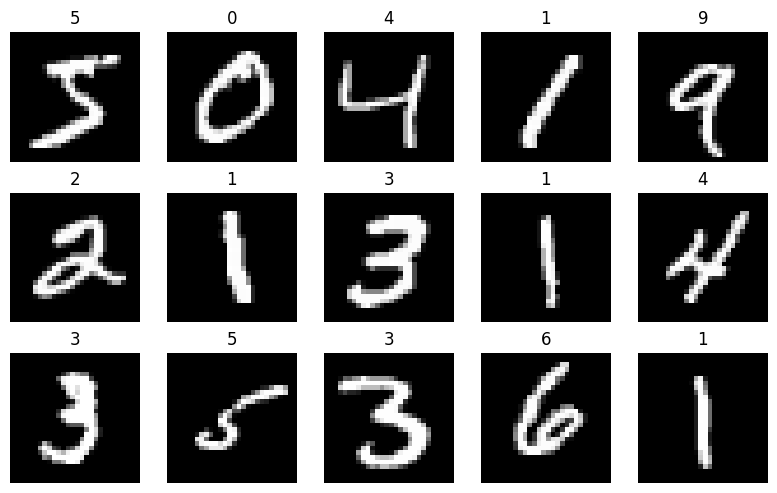

In [5]:
fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  ax.imshow(x_train[i],cmap =  'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))
plt.tight_layout()
plt.show()

In [6]:
##정규화 : 0~1 사이 값으로 변환, 최대값으로 나눈다
x_trian_n = x_train / x_train.max()

In [7]:
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [8]:
##차원 축소
x_train.reshape(60000,-1).shape

(60000, 784)

In [9]:
tf.keras.layers.Flatten()(x_train).shape

TensorShape([60000, 784])

활설화 함수 : 출력 함수

In [10]:
tf.keras.layers.Dense(128,activation = 'relu')

In [11]:
##출력층이 1인 경우 : sigmoid
tf.keras.layers.Dense(1,activation = 'sigmoid')

In [12]:
##출력층노드 =  2개 이상인 경우 : softmax
tf.keras.layers.Dense(10,activation = 'softmax')

In [13]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(256,activation = 'relu'),
                             tf.keras.layers.Dense(64,activation = 'relu'),
                             tf.keras.layers.Dense(32,activation = 'relu'),
                             tf.keras.layers.Dense(10,activation = 'softmax')])

In [14]:
##출력 노드 가 1개. sigmoid 활성화 함수를 적용한 경우
model.compile(loss = 'binary_crossenttropy')

In [15]:
##출력 노드 가 2개 이상. sofrmax 활성화 함수를 적용한 경우
model.compile(loss = 'categorical_crossenttropy')

In [16]:
##y가 원 핫 벡터가 아닌 경우
model.compile(loss = 'sparse_categorical_crossenttropy')

옵티마이저 : 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 최적화화 방법

In [17]:
##클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam)

##문자열로 지정
model.compile(optimizer = 'adam')


In [18]:
## 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer = adam,loss = 'sparse_categorical_crossentropy',metrics = [acc])

모델 훈련시 훈련 데이터 : x_train,y_train 검증 데이터 : validation_data = (x_test,y_test)

In [19]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10 )

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.9060 - sparse_categorical_accuracy: 0.8773 - val_loss: 0.2812 - val_sparse_categorical_accuracy: 0.9272
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2028 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.2188 - val_sparse_categorical_accuracy: 0.9390
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1572 - sparse_categorical_accuracy: 0.9563 - val_loss: 0.1658 - val_sparse_categorical_accuracy: 0.9549
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1330 - sparse_categorical_accuracy: 0.9632 - val_loss: 0.1261 - val_sparse_categorical_accuracy: 0.9652
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1087 - sparse_categorical_accuracy: 0.9699 - val_loss: 0.1492 - val_sparse_categorical_accuracy: 0.9634
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0939

In [20]:
##검증
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1033 - sparse_categorical_accuracy: 0.9761


[0.10331433266401291, 0.9761000275611877]

In [21]:
# 검증 결과 저장
test_loss, test_acc = model.evaluate(x_test,y_test)
print('검증 셋 정확도:',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1033 - sparse_categorical_accuracy: 0.9761
검증 셋 정확도: 0.9761000275611877


In [22]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([1.1322434e-15, 7.7282514e-10, 1.3044622e-08, 1.0613065e-06,
       1.9002417e-08, 6.6074118e-10, 6.0935457e-15, 9.9999827e-01,
       1.8712940e-09, 6.4532782e-07], dtype=float32)

In [23]:
predictions[0].max()

0.9999983

In [24]:
np.argmax(predictions[0])

7

In [25]:
predictions[0].min()

1.1322434e-15

In [26]:
np.argmin(predictions[0])

0

In [27]:
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx],y_test[idx],np.argmax(predictions[idx]),100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

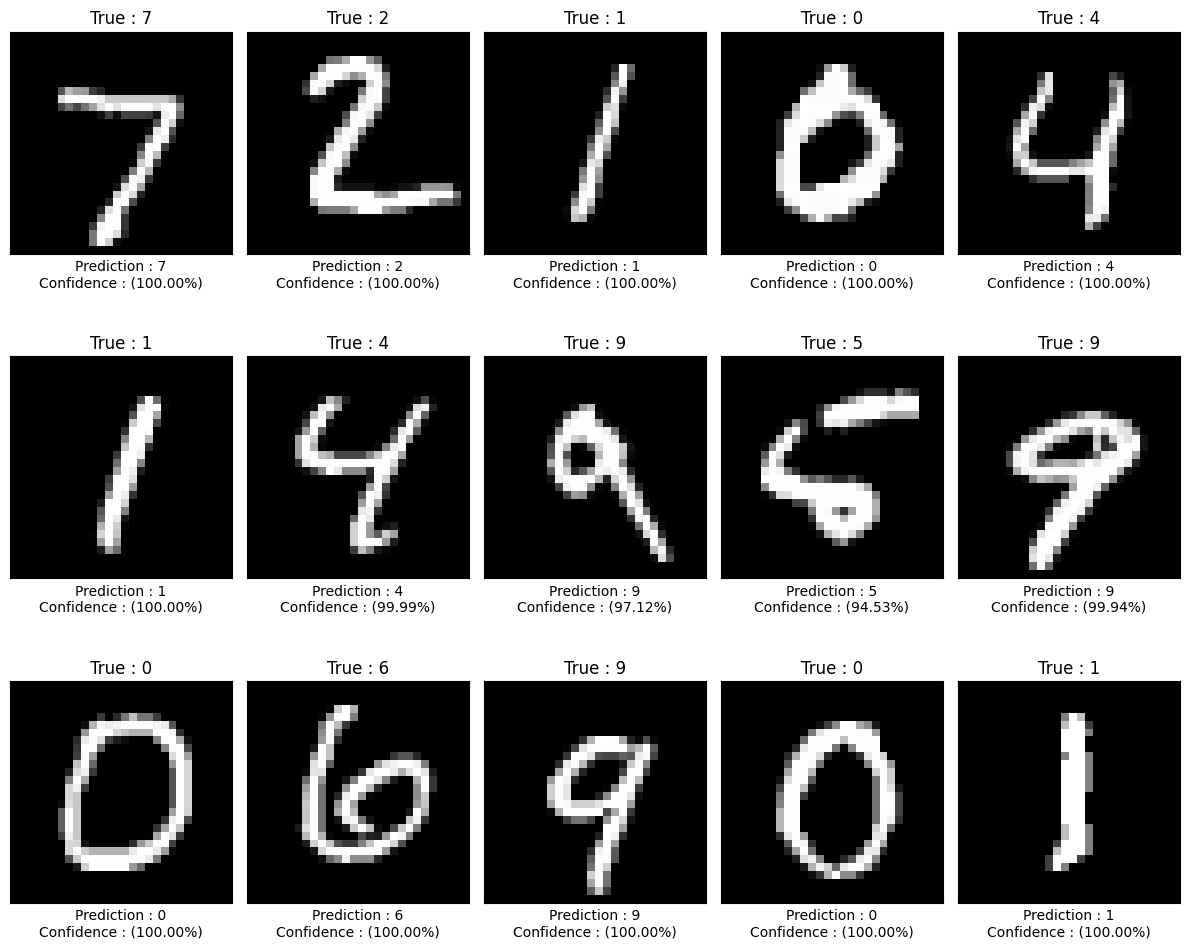

In [28]:
fig,axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
  ax = axes[i//5, i%5]
  img,y_true,y_pred,confidence = get_one_result(i)
  ax.imshow(img,cmap =  'gray')
  ##x,y축 눈금

  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True : {y_true}',fontsize= 12)
  ax.set_xlabel(f'Prediction : {y_pred}\nConfidence : ({confidence:.2f}%)',fontsize= 10)
plt.tight_layout()
plt.show()

#4.1 가중치 초기화 
1. he_uniform :  활설화 함수가 ReLU인 경우 사용
2. glorot_uniform : 활성화 함수가 Sigmoid, Tahn 인 경우 사용

In [29]:
##kernel_initializer = 'uniform'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'uniform', activation = 'relu')

In [30]:
##kernel_initializer = 'normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'normal', activation = 'relu')

In [31]:
##kernel_initializer = 'he_normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'he_normal', activation = 'relu')

In [32]:
dense = tf.keras.layers.Dense(256,kernel_initializer = 'uniform', activation = 'relu')

In [33]:
tf.keras.layers.Dropout(0.25)

In [34]:
print("train set: ", x_train.shape, y_train.shape)
print("test set: ", x_test.shape, x_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000, 28, 28)


In [35]:
##가중치를 적용하지 않은 경우
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [46]:
adam = tf.keras.optimizers.Adam(lr=0.001)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer=adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [47]:
###keral_initializer = 'he_normal'을 적용한 경우
model_w_he = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, kernel_initializer = 'he_normal',activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model_w_he.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                50240     
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_w_he.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history_w_he = model_w_he.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.4483 - accuracy: 0.6894 - val_loss: 0.6696 - val_accuracy: 0.8462
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5061 - accuracy: 0.8796 - val_loss: 0.4228 - val_accuracy: 0.9033
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3211 - accuracy: 0.9226 - val_loss: 0.3111 - val_accuracy: 0.9291
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2354 - accuracy: 0.9421 - val_loss: 0.2409 - val_accuracy: 0.9447
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1887 - accuracy: 0.9517 - val_loss: 0.1988 - val_accuracy: 0.9497
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1597 - accuracy: 0.9588 - val_loss: 0.1795 - val_accuracy: 0.9595
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1394 - accuracy: 0.9634 - val_loss: 0.1891 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

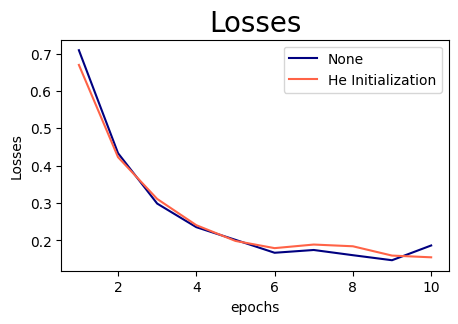

In [50]:
##두 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

In [51]:
###keral_initializer = 'glorot_normal'을 적용한 경우
model_w_gl = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, kernel_initializer = 'glorot_normal',activation = 'sigmoid'),
                             tf.keras.layers.Dense(32, activation = 'sigmoid'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model_w_gl.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                50240     
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_w_gl.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_w_gl = model_w_gl.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7824 - accuracy: 0.8031 - val_loss: 0.4467 - val_accuracy: 0.8752
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4092 - accuracy: 0.8777 - val_loss: 0.3594 - val_accuracy: 0.8905
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3737 - accuracy: 0.8846 - val_loss: 0.3563 - val_accuracy: 0.8895
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3372 - accuracy: 0.8955 - val_loss: 0.2987 - val_accuracy: 0.9092
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3270 - accuracy: 0.8990 - val_loss: 0.3201 - val_accuracy: 0.9009
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3014 - accuracy: 0.9061 - val_loss: 0.2790 - val_accuracy: 0.9139
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2995 - accuracy: 0.9071 - val_loss: 0.3008 - val_acc

<function matplotlib.pyplot.show(close=None, block=None)>

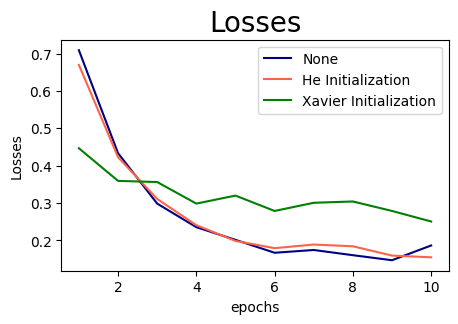

In [53]:
##세 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.plot(np.arange(1,11), history_w_gl.history['val_loss'], color = 'green', label = 'Xavier Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

#4-2 규제 Regularization)
1. L1 : 가중치의 절대 값에 0.001을 곱하여 비용 추가 0.001
2. L2 : 가중치의 제곱에 0.001을 곱하여 비용 추가 0.001

In [64]:
regularizer2 = tf.keras.regularizers.l2(0.001)
L2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer = 'normal', kernel_regularizer = regularizer2, activation = 'relu'),
    tf.keras.layers.Dense(32,kernel_initializer = 'normal', kernel_regularizer = regularizer2, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [65]:
L2_model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
L2_model = L2_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8175 - accuracy: 0.8394 - val_loss: 0.3583 - val_accuracy: 0.9298
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3122 - accuracy: 0.9358 - val_loss: 0.2476 - val_accuracy: 0.9499
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2410 - accuracy: 0.9512 - val_loss: 0.2316 - val_accuracy: 0.9528
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2080 - accuracy: 0.9592 - val_loss: 0.2172 - val_accuracy: 0.9573
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1951 - accuracy: 0.9624 - val_loss: 0.1897 - val_accuracy: 0.9646
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1880 - accuracy: 0.9643 - val_loss: 0.1905 - val_accuracy: 0.9649
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1818 - accuracy: 0.9659 - val_loss: 0.1983 - val_accurac

In [66]:
##L1규제
regularizer1 = tf.keras.regularizers.l1(0.001)
L1_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer = 'normal', kernel_regularizer = regularizer1, activation = 'relu'),
    tf.keras.layers.Dense(32,kernel_initializer = 'normal', kernel_regularizer = regularizer1, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [67]:
L1_model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
L1_model = L1_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.7371 - accuracy: 0.8539 - val_loss: 0.9356 - val_accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7380 - accuracy: 0.9272 - val_loss: 0.6228 - val_accuracy: 0.9285
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5371 - accuracy: 0.9362 - val_loss: 0.4531 - val_accuracy: 0.9488
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4704 - accuracy: 0.9411 - val_loss: 0.5661 - val_accuracy: 0.9253
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4267 - accuracy: 0.9469 - val_loss: 0.4653 - val_accuracy: 0.9374
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4058 - accuracy: 0.9494 - val_loss: 0.4074 - val_accuracy: 0.9472
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3953 - accuracy: 0.9514 - val_loss: 0.3559 - val_accura

<function matplotlib.pyplot.show(close=None, block=None)>

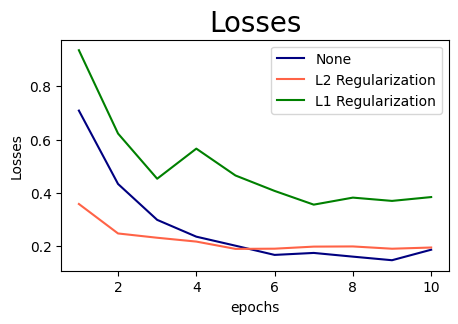

In [71]:
##L2 규제 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11),history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), L2_model.history['val_loss'], color = 'tomato', label = 'L2 Regularization')
plt.plot(np.arange(1,11), L1_model.history['val_loss'], color = 'green', label = 'L1 Regularization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

#4.3 드롭아웃(Dropout)
비율로 로드수를 줄여나가는 방법

In [73]:
regularizer1 = tf.keras.regularizers.l1(0.001)
Droup_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer = 'normal', kernel_regularizer = regularizer1, activation = 'relu'),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(32,kernel_initializer = 'normal', kernel_regularizer = regularizer1, activation = 'relu'),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])
Droup_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trai

In [74]:
Droup_model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
Droup_model = Droup_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.5817 - accuracy: 0.8583 - val_loss: 0.8703 - val_accuracy: 0.9272
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6726 - accuracy: 0.9361 - val_loss: 0.5167 - val_accuracy: 0.9470
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4954 - accuracy: 0.9444 - val_loss: 0.4348 - val_accuracy: 0.9485
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4434 - accuracy: 0.9460 - val_loss: 0.4116 - val_accuracy: 0.9507
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4176 - accuracy: 0.9492 - val_loss: 0.3701 - val_accuracy: 0.9553
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3999 - accuracy: 0.9508 - val_loss: 0.3768 - val_accuracy: 0.9536
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3876 - accuracy: 0.9519 - val_loss: 0.3839 - val_accura

<function matplotlib.pyplot.show(close=None, block=None)>

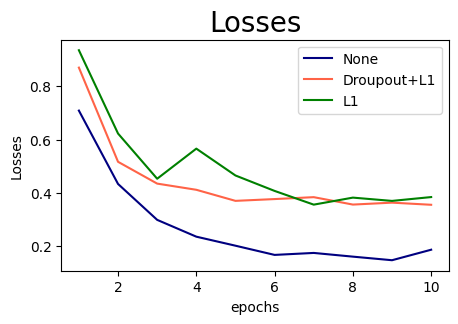

In [83]:
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), Droup_model.history['val_loss'], color = 'tomato', label = 'Droupout+L1')
plt.plot(np.arange(1,11), L1_model.history['val_loss'], color = 'green', label = 'L1')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

4-4배치 정규화 (BatchNormalization)
1. 각층에서 스케일을 조정



In [116]:
batch_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation = 'ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation = 'ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [118]:
batch_model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
batch_model = batch_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3055 - accuracy: 0.9108 - val_loss: 0.1519 - val_accuracy: 0.9546
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1509 - accuracy: 0.9543 - val_loss: 0.1160 - val_accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1204 - accuracy: 0.9636 - val_loss: 0.1010 - val_accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0985 - accuracy: 0.9692 - val_loss: 0.1082 - val_accuracy: 0.9667
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0876 - accuracy: 0.9723 - val_loss: 0.0956 - val_accuracy: 0.9705
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0771 - accuracy: 0.9749 - val_loss: 0.0907 - val_accuracy: 0.9721
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0693 - accuracy: 0.9775 - val_loss: 0.0867 - val_accu

<function matplotlib.pyplot.show(close=None, block=None)>

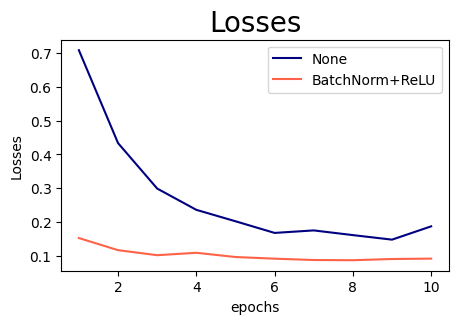

In [119]:
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), batch_model.history['val_loss'], color = 'tomato', label = 'BatchNorm+ReLU')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

#4-5 활성화 함수
1.ReLu
2.LeakyReLU

In [120]:
Leaky_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [121]:
Leaky_model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
Leaky_model = Leaky_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3225 - accuracy: 0.9104 - val_loss: 0.1549 - val_accuracy: 0.9542
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1599 - accuracy: 0.9518 - val_loss: 0.1213 - val_accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1257 - accuracy: 0.9619 - val_loss: 0.1026 - val_accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1097 - accuracy: 0.9658 - val_loss: 0.1088 - val_accuracy: 0.9660
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0951 - accuracy: 0.9699 - val_loss: 0.0889 - val_accuracy: 0.9731
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0871 - accuracy: 0.9722 - val_loss: 0.0950 - val_accuracy: 0.9718
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0799 - accuracy: 0.9744 - val_loss: 0.0867 - val_acc

<function matplotlib.pyplot.show(close=None, block=None)>

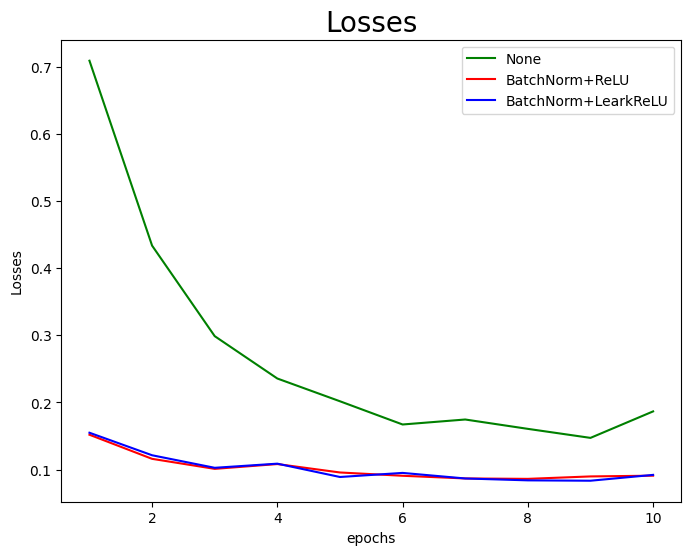

In [122]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'green', label = 'None')
plt.plot(np.arange(1,11), batch_model.history['val_loss'], color = 'red', label = 'BatchNorm+ReLU')
plt.plot(np.arange(1,11), Leaky_model.history['val_loss'], color = 'blue', label = 'BatchNorm+LearkReLU')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show